# The Basic steps involved in forecasting problem are:
1. Define the problem
2. Collect the data
3. For doing the data preparation —<br>
> 3.1 Find the 21 unique Market Segments<br>
    3.2 Calculate the CoV for each market segment<br>
    >> 3.3.1 Find the most profitable market segment<br>
    3.3.2 Take out the sales data of selected dataframe whose CoV is least ,from main dataframe<br>
    3.3.3 Checknull values
4. Analyze the data
> 4.1 Handling Outliers<br>
    4.2 Histogram plot<br>
    4.3 Decompostion of times series data (additive and multiplicative)
5. Build and evaluate time series forecast based on 
> 5.1 Smoothing Techniques<br>
> 1. Naive Method<br>
  2. Simple average method<br>
  3. Simple Moving Average Method<br>
  4. Simple exponential smoothing<br>
  5. Holt's Exponential Smoothing Method with Trend<br>
  6. Holt Winters's Additive Exponential Smoothing Method with Trend and Seasonality<br>
  7. Holt Winters's Multiplicative Exponential Smoothing Method with Trend and Seasonality<br>

> 5.2 Conditions for Auto-Regressive Models<br>
Satisfy below steps for performing Auto-Regressive Models<br>
>I) Stationarity vs non-Stationarity time series<br>
>> Test for finding Stationarity and Non-Stationarity<br>
1.Augmented Dickey-Fuller (ADF) Test<br>
        2.KPSS test <br>
        
>>The two tools to convert a non-stationary series into stationary series<br>
        1. Transformation<br>
        2. Differencing<br>

>II) Autocorrelation<br>
    Two graphs used for autocorrelation<br>
    > 1.ACF<br>
    2. PACF

> 5.3 List of ARIMA models performed
>  1. AR model<br>
 2. MA model<br>
 3. ARMA model<br>
 4. ARIMA model<br>
 5. SARIMA model<br>


6. Conclusion

# Task 1:  Define the problem:
> Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate & home office.
As a sales manager for this store, you have to **forecast the sales and quantity of the products for the next 6 months**, so that you have an estimate of the demand and the sales of the products in those months and can plan your inventory and business processes accordingly.<br>



# Task 2 : Collect the data 
> ## Task 2.1: Reading and Inspection of Time series forecasting data
> -  ### Subtask 2.1.1: Import required packages and Import and read the data <br>
Import and read the movie database. Store it in a variable called `data1`.

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Import time series data: Global2

In [18]:
data1 = pd.read_csv('Global2.csv')
data1.head()

,Order Date,Segment,Market,Sales,Quantity,Profit
0,31-07-2012,Consumer,US,2309.650,7,762.1845
1,05-02-2013,Corporate,APAC,3709.395,9,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,9,919.9710
3,28-01-2013,Home Office,EU,2892.510,5,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,8,311.5200


- #### convert the "Order Date" column into date- time format 

In [19]:
data1['Order Date']= pd.to_datetime(data1['Order Date'], format='%d-%m-%Y')

In [20]:
data1.head()

,Order Date,Segment,Market,Sales,Quantity,Profit
0,2012-07-31,Consumer,US,2309.650,7,762.1845
1,2013-02-05,Corporate,APAC,3709.395,9,-288.7650
2,2013-10-17,Consumer,APAC,5175.171,9,919.9710
3,2013-01-28,Home Office,EU,2892.510,5,-96.5400
4,2013-11-05,Consumer,Africa,2832.960,8,311.5200


>-  ### Subtask 1.2: Inspect the dataframe
 Inspect the dataframe's columns, shapes, variable types etc.

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  51290 non-null  datetime64[ns]
 1   Segment     51290 non-null  object        
 2   Market      51290 non-null  object        
 3   Sales       51290 non-null  float64       
 4   Quantity    51290 non-null  int64         
 5   Profit      51290 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.3+ MB


In [22]:
data1.describe()

,Sales,Quantity,Profit
count,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,28.610982
std,487.565361,2.278766,174.340972
min,0.444000,1.000000,-6599.978000
25%,30.758625,2.000000,0.000000
50%,85.053000,3.000000,9.240000
75%,251.053200,5.000000,36.810000
max,22638.480000,14.000000,8399.976000


In [23]:
data1.shape

(51290, 6)

In [24]:
data1.head()

,Order Date,Segment,Market,Sales,Quantity,Profit
0,2012-07-31,Consumer,US,2309.650,7,762.1845
1,2013-02-05,Corporate,APAC,3709.395,9,-288.7650
2,2013-10-17,Consumer,APAC,5175.171,9,919.9710
3,2013-01-28,Home Office,EU,2892.510,5,-96.5400
4,2013-11-05,Consumer,Africa,2832.960,8,311.5200


In [25]:
# Write your code for column-wise null percentages here
print(round(100*(data1.isnull().sum()/len(data1.index)), 2))

Order Date    0.0
Segment       0.0
Market        0.0
Sales         0.0
Quantity      0.0
Profit        0.0
dtype: float64


# Task 3: Data preparation

## 3.1 Find the 21 unique Market Segments

In [26]:
data1['Market_Segment']= data1[['Market', 'Segment']].apply(lambda x: '_'.join(x), axis=1)
data1.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,Market_Segment
0,2012-07-31,Consumer,US,2309.650,7,762.1845,US_Consumer
1,2013-02-05,Corporate,APAC,3709.395,9,-288.7650,APAC_Corporate
2,2013-10-17,Consumer,APAC,5175.171,9,919.9710,APAC_Consumer
3,2013-01-28,Home Office,EU,2892.510,5,-96.5400,EU_Home Office
4,2013-11-05,Consumer,Africa,2832.960,8,311.5200,Africa_Consumer


### Creating a Pivot table for getting the month wise total sum of profit by each market segment

In [27]:
df= pd.pivot_table(data=data1, values='Profit', index=pd.Grouper(key='Order Date', freq='1M'), columns='Market_Segment', aggfunc='sum')
df.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02-28,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03-31,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04-30,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05-31,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


## Task 3.2: Calculate the CoV for each market segment
- **The lower the value of the coefficient of variation, the more precise the estimate.**<br>
- ### KEY TAKEAWAYS
The coefficient of variation (CV) is a statistical measure of the dispersion of data points in a data series around the mean.
In finance, the coefficient of variation allows investors to determine how much volatility, or risk, is assumed in comparison to the amount of return expected from investments.
The lower the ratio of the standard deviation to mean return, the better risk-return trade-off.
Coefficient of Variation Formula
Below is the formula for how to calculate the coefficient of variation:

\begin{aligned} &\text{CV} = \frac { \sigma }{ \mu } \\ &\textbf{where:} \\ &\sigma = \text{standard deviation} \\ &\mu = \text{mean} \\ \end{aligned} 
​	  
CV= 
μ
σ
​	 
where:
σ=standard deviation
μ=mean
​	


#### CoV calculations will be done on train data

In [28]:
train_len= 42
#test_len= 33
train= df[0:train_len]
test= df[train_len:]

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2011-01-31 to 2014-06-30
Freq: M
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   APAC_Consumer       42 non-null     float64
 1   APAC_Corporate      42 non-null     float64
 2   APAC_Home Office    42 non-null     float64
 3   Africa_Consumer     42 non-null     float64
 4   Africa_Corporate    42 non-null     float64
 5   Africa_Home Office  42 non-null     float64
 6   Canada_Consumer     36 non-null     float64
 7   Canada_Corporate    28 non-null     float64
 8   Canada_Home Office  20 non-null     float64
 9   EMEA_Consumer       42 non-null     float64
 10  EMEA_Corporate      42 non-null     float64
 11  EMEA_Home Office    42 non-null     float64
 12  EU_Consumer         42 non-null     float64
 13  EU_Corporate        42 non-null     float64
 14  EU_Home Office      42 non-null     float64
 15  LATAM_Consumer      42 non-null

In [30]:
mean_std=train.agg(["mean", "std"])
mean_std

,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
mean,4223.553586,2556.998957,1379.120743,798.898929,426.027286,333.002143,230.067500,110.377500,138.247500,415.354786,...,123.249214,3627.517036,2251.993036,1097.441500,2252.677529,1075.994223,788.531853,2603.736252,1853.568607,1062.397424
std,2549.477997,1894.221175,1463.978445,1155.735900,717.859321,670.661897,344.418377,134.571077,310.386097,1142.195257,...,756.777567,2377.233468,1571.220713,1238.125098,1551.949398,958.635571,1072.390528,2886.427650,1927.082015,1308.753741


In [31]:
Cov_values=mean_std.iloc[1]/mean_std.iloc[0]
Cov_values

APAC_Consumer         0.603633
APAC_Corporate        0.740799
APAC_Home Office      1.061530
Africa_Consumer       1.446661
Africa_Corporate      1.685008
Africa_Home Office    2.013987
Canada_Consumer       1.497032
Canada_Corporate      1.219189
Canada_Home Office    2.245148
EMEA_Consumer         2.749927
EMEA_Corporate        6.861820
EMEA_Home Office      6.140222
EU_Consumer           0.655334
EU_Corporate          0.697702
EU_Home Office        1.128192
LATAM_Consumer        0.688935
LATAM_Corporate       0.890930
LATAM_Home Office     1.359984
US_Consumer           1.108571
US_Corporate          1.039660
US_Home Office        1.231887
dtype: float64

### Inference:
**APAC_Consumer has leat CoV value among all marget segments ,hence it has choosen for further analysis because it has less fluctuations**

## 3.3 Find the most profitable market segment

### Inference:
> There are three important characteristics that every time series data must exhibit in order for us to make a good forecast.
1. Relevant: the time-series data of "consumer Quantity of APAC" chossen from 21 dataframes as its CoV values is least
2. Accurate: data is accurate in terms of capturing timestamp of monthwise data 
3. Long enough:  "APAC_ consumer" has (5699)as data is high also among all
- Based on these "APAC_ consumer" market segment is the most consistently profitable and accordingly<br> 


**Most profitable market segment Data : "APAC_Consumer" .**

In [32]:
data1.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,Market_Segment
0,2012-07-31,Consumer,US,2309.650,7,762.1845,US_Consumer
1,2013-02-05,Corporate,APAC,3709.395,9,-288.7650,APAC_Corporate
2,2013-10-17,Consumer,APAC,5175.171,9,919.9710,APAC_Consumer
3,2013-01-28,Home Office,EU,2892.510,5,-96.5400,EU_Home Office
4,2013-11-05,Consumer,Africa,2832.960,8,311.5200,Africa_Consumer


In [33]:
data1.shape

(51290, 7)

- **Take out the Quantity and Order date from the APAC consumer's data for analysis and forcasting**

### 3.3.1 take out the data Quantity data of consumer in APAC Market

In [34]:
APAC_Consumer= data1[(data1.Market_Segment== 'APAC_Consumer')]
APAC_Consumer= APAC_Consumer.sort_values(by='Order Date')
APAC_Consumer.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,Market_Segment
42055,2011-01-01,Consumer,APAC,55.242,2,15.342,APAC_Consumer
22951,2011-01-01,Consumer,APAC,120.366,3,36.036,APAC_Consumer
31869,2011-01-01,Consumer,APAC,113.670,5,37.770,APAC_Consumer
2709,2011-01-03,Consumer,APAC,912.456,4,-319.464,APAC_Consumer
47553,2011-01-03,Consumer,APAC,6.006,1,0.546,APAC_Consumer


In [35]:
APAC_Consumer= APAC_Consumer.drop(['Segment','Market'],axis=1)
APAC_Consumer.head()

,Order Date,Sales,Quantity,Profit,Market_Segment
42055,2011-01-01,55.242,2,15.342,APAC_Consumer
22951,2011-01-01,120.366,3,36.036,APAC_Consumer
31869,2011-01-01,113.670,5,37.770,APAC_Consumer
2709,2011-01-03,912.456,4,-319.464,APAC_Consumer
47553,2011-01-03,6.006,1,0.546,APAC_Consumer


In [36]:
APAC_Consumer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5699 entries, 42055 to 30632
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      5699 non-null   datetime64[ns]
 1   Sales           5699 non-null   float64       
 2   Quantity        5699 non-null   int64         
 3   Profit          5699 non-null   float64       
 4   Market_Segment  5699 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 267.1+ KB


In [37]:
monthly_data_APAC= APAC_Consumer.groupby(pd.Grouper(key='Order Date', freq='1M')).sum()
Quantity_forecast= monthly_data_APAC[['Quantity']]
Quantity_forecast.head()

,Quantity
Order Date,
2011-01-31,214
2011-02-28,151
2011-03-31,283
2011-04-30,148
2011-05-31,244


In [38]:
Quantity_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-31 to 2014-12-31
Freq: M
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Quantity  48 non-null     int64
dtypes: int64(1)
memory usage: 768.0 bytes


### 3.3.2 Checking null values 

In [39]:

Quantity_forecast.isnull().sum()

Quantity    0
dtype: int64

In [40]:
Quantity_forecast.shape

(48, 1)

### Inference:
- so get the months from "Order date" column and also sum the whole sales in that specific month<br> that's why total rows will become 48 now , as 4 years contains 48 months in total , hence no repitions of months now 

# Task 4:  Analyze the Data
1. Level : This is the baseline of a time series. This gives the baseline to which we add the different other components.
2. Trend : Over a long term, this gives an indication of whether the time series moves lower or higher.
3. Seasonality: It is a pattern in a time-series data that repeats itself after a given period of time.
4. Noise: Noise is the completely random fluctuation present in the data and we cannot use this component to forecast into the future

### Plot time series data "Quantity of APAC for Consumer segment" 

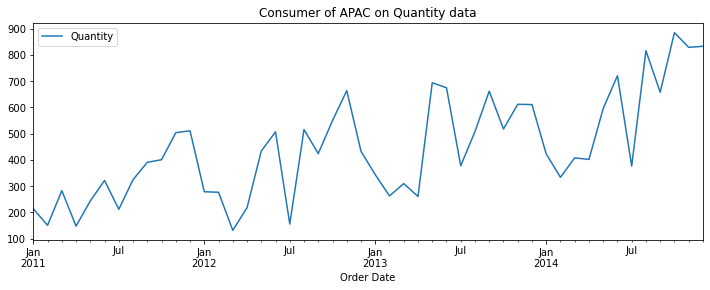

In [41]:
Quantity_forecast.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Consumer of APAC on Quantity data')
plt.show(block=False)

### Inference:
**The graph shows a trend and seasonality both**
>- **no missing values in this Sales_APAC_consumer hence no need of missing value treatment( mean/ linear imputation )**


## 4.1 :  Outlier detection
- Box plot and interquartile range

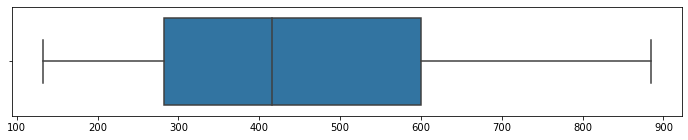

In [42]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=Quantity_forecast,whis=1.5)

In [43]:
Quantity_forecast.describe()

,Quantity
count,48.000000
mean,446.125000
std,199.431919
min,132.000000
25%,282.000000
50%,415.500000
75%,599.750000
max,885.000000


In [44]:
Quantity_forecast.head()

,Quantity
Order Date,
2011-01-31,214
2011-02-28,151
2011-03-31,283
2011-04-30,148
2011-05-31,244


## 4.2:  Histogram plot

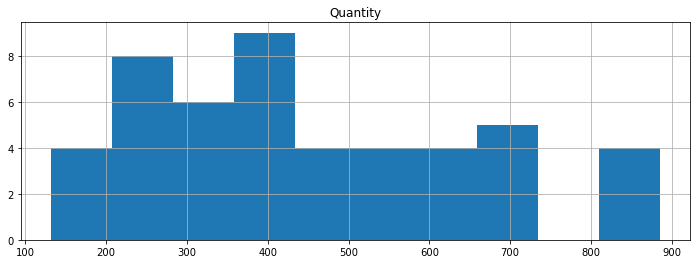

In [45]:
fig = Quantity_forecast.hist(figsize = (12,4))

## 4.3  : Time series Decomposition
### Additive seasonal decomposition
Additive Seasonal Decomposition - the individual components can be added to get the time-series data

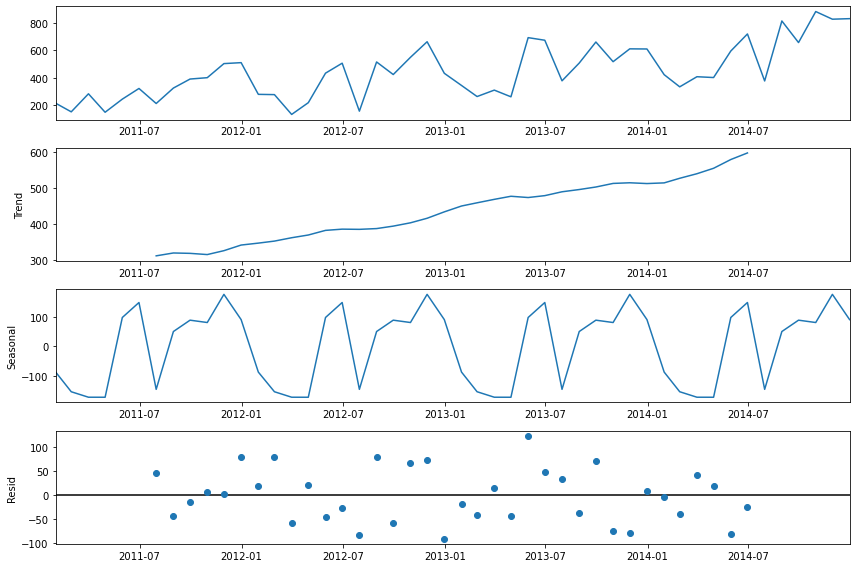

In [46]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(Quantity_forecast, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition
Multiplicative Seasonal Decomposition - the individual components can be multiplied to get the time-series data

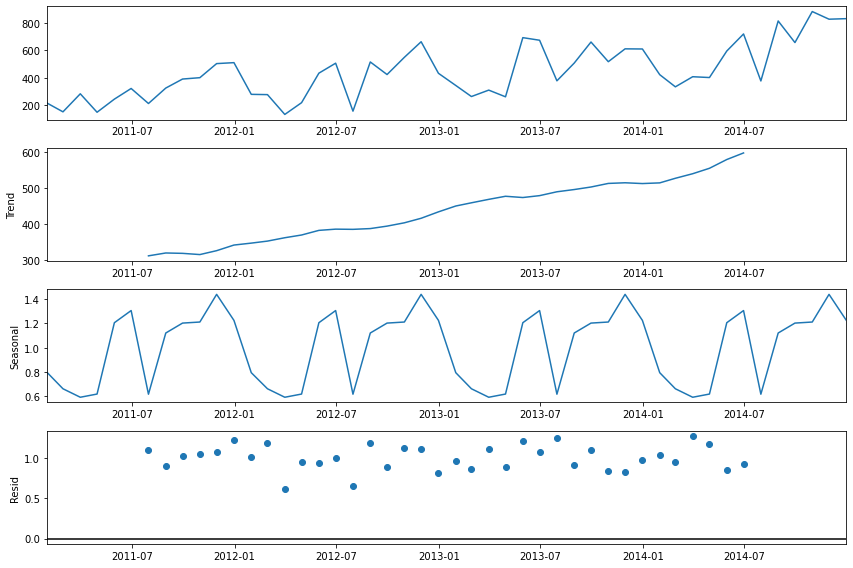

In [47]:
decomposition = sm.tsa.seasonal_decompose(Quantity_forecast,model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

### Inference:
- In this time series decompositions (Additive and multiplicative) **clear upward trend and seasonality component** are shown in the graph.Both have residue and noise where in additive the noise is slightly more 

# 5. Build and evaluate time series forecast
- Splitting time series into training and test sets



In [48]:
Quantity_forecast.shape

(48, 1)

### To check how the quantity forecasts look for the next 6 months. So dividing the data accordingly.

In [49]:
Sales_APAC_consumer=Quantity_forecast.reset_index()

In [50]:
Sales_APAC_consumer.head()

,Order Date,Quantity
0,2011-01-31,214
1,2011-02-28,151
2,2011-03-31,283
3,2011-04-30,148
4,2011-05-31,244


In [51]:
#in_range_df = df[df["date"].isin(pd.date_range("2017-01-15", "2017-01-20"))]
in_range_df= Sales_APAC_consumer[Sales_APAC_consumer['Order Date'].isin(pd.date_range("2014-06-01","2014-12-01"))]

In [52]:
in_range_df.shape

(6, 2)

## train and test splitting

In [53]:
#To check how the sales and quantity forecasts look for the next 6 months. So dividing the data accordingly.
train_len= 42
train= Quantity_forecast[0:train_len]
test= Quantity_forecast[train_len:]

In [54]:
print(train.shape)
print(test.shape)

(42, 1)
(6, 1)


## 5.1 Smoothing Techniques
> **1. Naive Method<br>
2. Simple average method<br>
3. Simple Moving Average Method<br>
4. Simple exponential smoothing<br>
5. Holt's Exponential Smoothing Method with Trend<br>
6. Holt Winters's Additive Exponential Smoothing Method with Trend and Seasonality<br>
7. Holt Winters's Multiplicative Exponential Smoothing Method with Trend and Seasonality<br>**

### 1. Naive Method
Forecast = Last month’s sales

In [55]:
y_hat_naive= test.copy()
y_hat_naive['naive_forecast']= train['Quantity'][train_len-1]

In [56]:
y_hat_naive['naive_forecast']= train['Quantity'][train_len-1]

In [131]:
train['Quantity'][train_len-1]

721

In [130]:
y_hat_naive['naive_forecast']

Order Date
2014-07-31    721
2014-08-31    721
2014-09-30    721
2014-10-31    721
2014-11-30    721
2014-12-31    721
Freq: M, Name: naive_forecast, dtype: int64

### Plot train, test and forecast

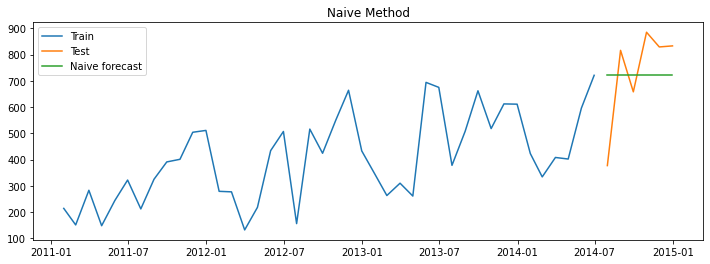

In [57]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label= 'Train')
plt.plot(test['Quantity'], label= 'Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE to evaluate forecast

In [58]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(test['Quantity'], y_hat_naive['naive_forecast'])).round(2)
mape= np.round(np.mean(np.abs(test['Quantity']-  y_hat_naive['naive_forecast'])/test['Quantity'])*100,2)

results= pd.DataFrame({"Method":['Naive Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results= results[['Method', 'MAPE', 'RMSE']]
results


,Method,MAPE,RMSE
0,Naive Method,26.24,174.37


### 2. Simple average method
Forecast = Average of all past months’ sales

In [59]:
y_hat_avg= test.copy()
y_hat_avg['avg_forecast']= train['Quantity'].mean()

### Plot train, test and forecast

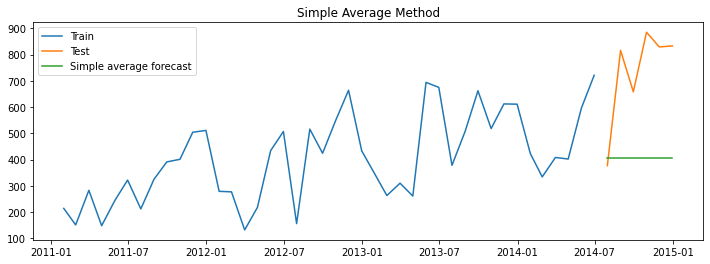

In [60]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label= 'Train')
plt.plot(test['Quantity'], label= 'Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE to evaluate forecast

In [61]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(test['Quantity'], y_hat_avg['avg_forecast'])).round(2)
mape= np.round(np.mean(np.abs(test['Quantity']-  y_hat_avg['avg_forecast'])/test['Quantity'])*100,2)

tempresults= pd.DataFrame({"Method":['Simple Average Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results= pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive Method,26.24,174.37
0,Simple Average Method,42.16,371.15


### 3. Simple Moving Average Method
In this average of only the last few observations to forecast the future.
In this method, the **forecasts are calculated using the average of the time-series data in the moving window considered**. 
>The window keeps moving, the average values keep changing. This helps in forecasting values at every step in the dataset.


In [62]:
y_hat_sma= Quantity_forecast.copy()
ma_window= 12
y_hat_sma['sma_forecast']= Quantity_forecast['Quantity'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:]= y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

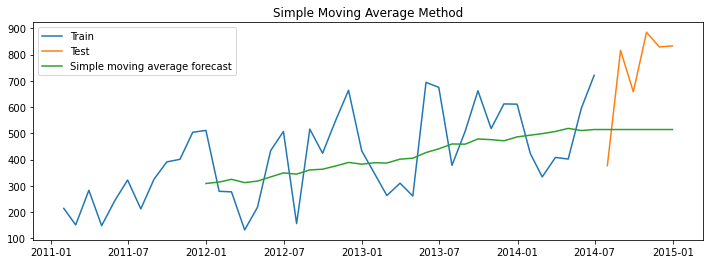

In [63]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label= 'Train')
plt.plot(test['Quantity'], label= 'Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE to evaluate forecast

In [64]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(test['Quantity'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape= np.round(np.mean(np.abs(test['Quantity']-  y_hat_sma['sma_forecast'][train_len:])/test['Quantity'])*100,2)

tempresults= pd.DataFrame({"Method":['Simple Moving Average Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results= pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive Method,26.24,174.37
0,Simple Average Method,42.16,371.15
0,Simple Moving Average Method,35.55,279.36


### 4. Simple Exponential Smoothing
In the weighted average technique, the underlying idea of this technique is that each observation influencing y(t+1) is assigned a specific weight. **More recent observations get more weight, whereas the previous observations get less weight.** Suppose you consider a time series data of 12 months and are forecasting y t+1 .
- Simple exponential smoothing technique that helps us in capturing the level of time series data.

In [65]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model= SimpleExpSmoothing(train['Quantity'])
model_fit= model.fit(optimized= True)
model_fit.params
print(model_fit.params)
y_hat_ses= test.copy()
y_hat_ses['ses_forecast']= model_fit.forecast(6)

{'smoothing_level': 0.2277372077645332, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 240.9314484016589, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [66]:
y_hat_ses.shape

(6, 2)

In [67]:
y_hat_ses['ses_forecast']

Order Date
2014-07-31    537.47935
2014-08-31    537.47935
2014-09-30    537.47935
2014-10-31    537.47935
2014-11-30    537.47935
2014-12-31    537.47935
Freq: M, Name: ses_forecast, dtype: float64

#### Plot train, test and forecast

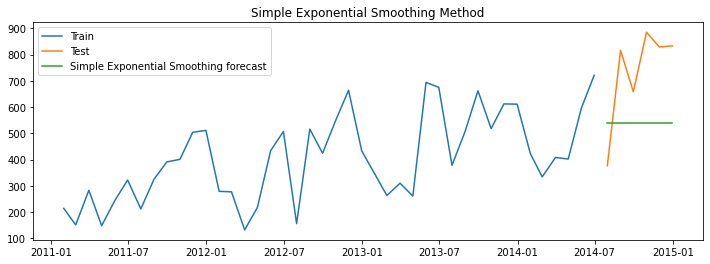

In [68]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label= 'Train')
plt.plot(test['Quantity'], label= 'Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple Exponential Smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

#### Calculate RMSE and MAPE

In [69]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(test['Quantity'], y_hat_ses['ses_forecast'])).round(2)
mape= np.round(np.mean(np.abs(test['Quantity']-  y_hat_ses['ses_forecast'])/test['Quantity'])*100,2)

tempresults= pd.DataFrame({"Method":['Simple exponential smoothing forecast'], 'MAPE':[mape], 'RMSE':[rmse]})
results= pd.concat([results, tempresults])
results
# Accuracy= 100-12.97

,Method,MAPE,RMSE
0,Naive Method,26.24,174.37
0,Simple Average Method,42.16,371.15
0,Simple Moving Average Method,35.55,279.36
0,Simple exponential smoothing forecast,34.15,261.71


### 5. Holt's Exponential Smoothing Method with Trend
- Technique which forecasts based on level, trend of a time series

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model= ExponentialSmoothing(np.asarray(train['Quantity']), seasonal_periods= 12, trend= 'additive', seasonal= None)
model_fit= model.fit(optimized= True)
print(model_fit.params)
y_hat_hes= test.copy()
y_hat_hes['holt_forecast']= model_fit.forecast(6)

{'smoothing_level': 6.34654109600404e-09, 'smoothing_slope': 9.763909378467728e-10, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 233.10577649656142, 'initial_slope': 8.001797407275422, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [71]:
y_hat_hes['holt_forecast']

Order Date
2014-07-31    577.183065
2014-08-31    585.184862
2014-09-30    593.186660
2014-10-31    601.188457
2014-11-30    609.190255
2014-12-31    617.192052
Freq: M, Name: holt_forecast, dtype: float64

#### Plot train, test and forecast

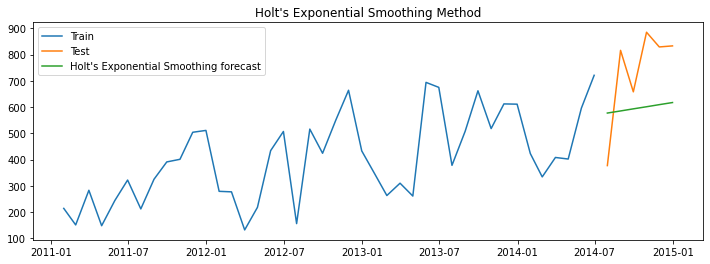

In [72]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label= 'Train')
plt.plot(test['Quantity'], label= 'Test')
plt.plot(y_hat_hes['holt_forecast'], label= "Holt's Exponential Smoothing forecast")
plt.legend(loc='best')
plt.title("Holt's Exponential Smoothing Method")
plt.show()

#### Calculate RMSE and MAPE

In [73]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(test['Quantity'], y_hat_hes['holt_forecast'])).round(2)
mape= np.round(np.mean(np.abs(test['Quantity']-  y_hat_hes['holt_forecast'])/test['Quantity'])*100,2)

tempresults= pd.DataFrame({"Method":["Holt's Exponential Smoothing Method"], 'MAPE':[mape], 'RMSE':[rmse]})
results= pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive Method,26.24,174.37
0,Simple Average Method,42.16,371.15
0,Simple Moving Average Method,35.55,279.36
0,Simple exponential smoothing forecast,34.15,261.71
0,Holt's Exponential Smoothing Method,29.29,213.30


### 6. Holt Winters's Additive Exponential Smoothing Method( Trend and Seasonality)
- Technique which forecasts based on level, trend and seasonality of a time series

In a time-series data, if the seasonality is not a function of the level component or the difference between subsequent troughs of the time series data does not increase as you progress in the graph, then the Holt-Winters’ additive method works best.

In [74]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model= ExponentialSmoothing(np.asarray(train['Quantity']), seasonal_periods= 12, trend= 'additive', seasonal= 'additive')
model_fit= model.fit(optimized= True)
print(model_fit.params)
y_hat_hwa= test.copy()
y_hat_hwa['hwa_forecast']= model_fit.forecast(6)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.47368421052631576, 'damping_slope': nan, 'initial_level': 315.0, 'initial_slope': 6.138888888888889, 'initial_seasons': array([-101., -164.,  -32., -167.,  -71.,    7., -103.,   10.,   76.,
         86.,  189.,  196.]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\ab\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [75]:
Holt_Winters_Additive=y_hat_hwa['hwa_forecast']

In [76]:
Holt_Winters_Additive

Order Date
2014-07-31    412.603446
2014-08-31    596.452647
2014-09-30    665.429487
2014-10-31    630.085274
2014-11-30    734.348021
2014-12-31    681.357068
Freq: M, Name: hwa_forecast, dtype: float64

#### Plot train, test and forecast


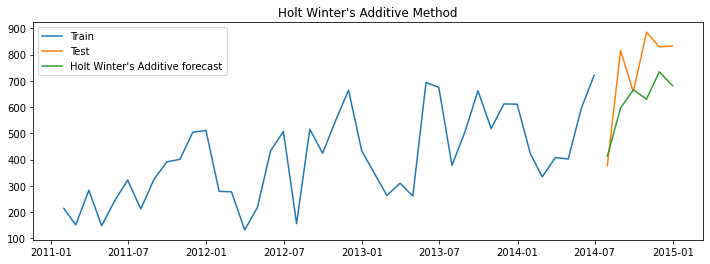

In [77]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label= 'Train')
plt.plot(test['Quantity'], label= 'Test')
plt.plot(y_hat_hwa['hwa_forecast'], label= "Holt Winter's Additive forecast")
plt.legend(loc='best')
plt.title("Holt Winter's Additive Method")
plt.show()


#### Calculate RMSE and MAPE

In [78]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(test['Quantity'], y_hat_hwa['hwa_forecast'])).round(2)
mape= np.round(np.mean(np.abs(test['Quantity']-  y_hat_hwa['hwa_forecast'])/test['Quantity'])*100,2)

tempresults= pd.DataFrame({"Method":["Holt Winter's Additive Method"], 'MAPE':[mape], 'RMSE':[rmse]})
results= pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive Method,26.24,174.37
0,Simple Average Method,42.16,371.15
0,Simple Moving Average Method,35.55,279.36
0,Simple exponential smoothing forecast,34.15,261.71
0,Holt's Exponential Smoothing Method,29.29,213.30
0,Holt Winter's Additive Method,15.98,156.24


### 7. Holt Winters's Multiplicative Exponential Smoothing Method ( Trend and Seasonality)
- Seasonality is a function of the level and the difference between the troughs of the time series data increases as you progress in the graph, then you use the multiplicative method.

In [79]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model= ExponentialSmoothing(np.asarray(train['Quantity']), seasonal_periods= 12, trend='additive', seasonal='mul')
model_fit= model.fit(optimized= True)
print(model_fit.params)
y_hat_hwm= test.copy()
y_hat_hwm['hwm_forecast']= model_fit.forecast(6)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.47368421052631576, 'damping_slope': nan, 'initial_level': 315.0, 'initial_slope': 6.138888888888889, 'initial_seasons': array([0.67936508, 0.47936508, 0.8984127 , 0.46984127, 0.77460317,
       1.02222222, 0.67301587, 1.03174603, 1.24126984, 1.27301587,
       1.6       , 1.62222222]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\ab\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [80]:
Holt_Winters_Multiplicative=y_hat_hwm['hwm_forecast']

In [81]:
Holt_Winters_Multiplicative.head()

Order Date
2014-07-31    373.227992
2014-08-31    627.627281
2014-09-30    712.543317
2014-10-31    683.503273
2014-11-30    832.421480
Freq: M, Name: hwm_forecast, dtype: float64

#### Plot train, test and forecast


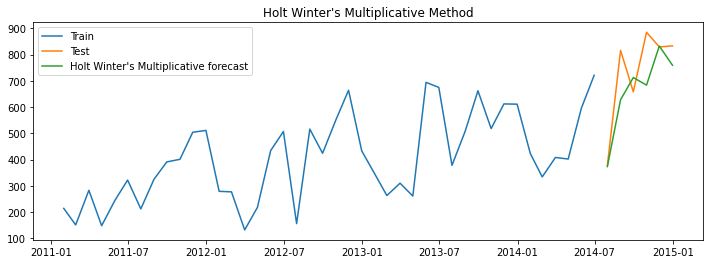

In [82]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label= 'Train')
plt.plot(test['Quantity'], label= 'Test')
plt.plot(y_hat_hwm['hwm_forecast'], label= "Holt Winter's Multiplicative forecast")
plt.legend(loc='best')
plt.title("Holt Winter's Multiplicative Method")
plt.show()


#### Calculate RMSE and MAPE

In [83]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(test['Quantity'], y_hat_hwm['hwm_forecast'])).round(2)
mape= np.round(np.mean(np.abs(test['Quantity']-  y_hat_hwm['hwm_forecast'])/test['Quantity'])*100,2)

tempresults= pd.DataFrame({"Method":["Holt Winter's Multiplicative Method"], 'MAPE':[mape], 'RMSE':[rmse]})
results= pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive Method,26.24,174.37
0,Simple Average Method,42.16,371.15
0,Simple Moving Average Method,35.55,279.36
0,Simple exponential smoothing forecast,34.15,261.71
0,Holt's Exponential Smoothing Method,29.29,213.30
0,Holt Winter's Additive Method,15.98,156.24
0,Holt Winter's Multiplicative Method,10.73,118.69


# 5.2 Autoregressive Models
> **1. AR model<br>
2. MA model<br>
3. ARMA model<br>
4. ARIMA model<br>
5. SARIMA model<br>**

### Satisfy below steps for Auto-Regressive Models
I) Stationarity vs non-Stationarity time series<br>
>Test for finding Stationarity and Non-Stationarity<br>
1.Augmented Dickey-Fuller (ADF) Test<br>
        2.KPSS test <br>
        
>The two tools to convert a non-stationary series into stationary series<br>
        1. Transformation<br>
        2. Differencing<br>
 
II) Autocorrelation
> ACF<br>
PACF

In [84]:
Sales_APAC_consumer.head()

,Order Date,Quantity
0,2011-01-31,214
1,2011-02-28,151
2,2011-03-31,283
3,2011-04-30,148
4,2011-05-31,244


# I) Stationarity vs non-Stationarity time series
- If a time series is stationary, its statistical properties like mean, variance, and covariance will be the same throughout the series, irrespective of the time at which you observe them.thn it is called as Stationarity otherwise its non-Stationarity time series

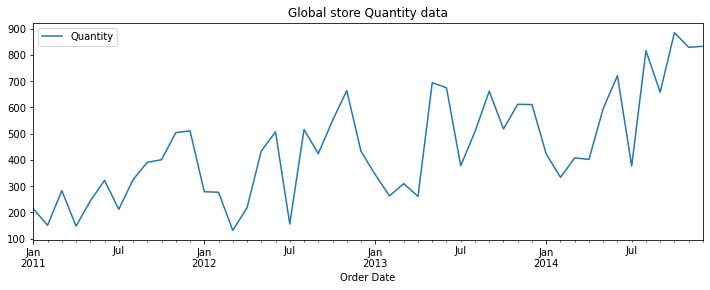

In [85]:
Quantity_forecast.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Global store Quantity data')
plt.show(block=False)

**- statistical properties like mean, variance, and covariance is not same throughout the series: its a non Stationarity time series data**

## Test for Checking Stationary time series 

### 1. Augmented Dickey-Fuller (ADF) Test

Null Hypothesis (H 0 ): The series is not stationary<br>
○ p−value>0.05<br>
● Alternate Hypothesis (H 1 ): The series is stationary<br>
○ p−value≤0.05<br>

In [86]:
from statsmodels.tsa.stattools import adfuller
adf_test= adfuller(Quantity_forecast['Quantity'])

print('ADF statistic: %f' % adf_test[0])
print('Critical value @ 0.05: % .2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])
# p-value is more than 0.05. We fail to reject the null hypothesis. So, it is not a stationary time series.

ADF statistic: 0.293145
Critical value @ 0.05: -2.94
p-value: 0.977028


**- p-value is more than 0.05 so it is not a stationary time series**

### 2. KPSS test
● Null Hypothesis (H 0 ): The series is stationary<br>
○ p−value>0.05<br>
● Alternate Hypothesis (H 1 ): The series is not stationary<br>
○ p−value≤0.05<br>

In [87]:

from statsmodels.tsa.stattools import kpss
kpss_test= kpss(Quantity_forecast['Quantity'])

print('KPSS statistic: %f' % kpss_test[0])
print('Critical value @ 0.05: % .2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])
# p-value is less than 0.05. So we can reject null hypothesis. So, it is not a stationary time series.

KPSS statistic: 0.593099
Critical value @ 0.05:  0.46
p-value: 0.023264


**- p-value is less than 0.05 so it is not a stationary time series**

## **The two tools to convert a non-stationary series into stationary series<br>**
>1. Transformation<br>
2. Differencing<br>

### 1. Box-Cox transformation
- This method is to introduce the stationarity by making the variance constant.

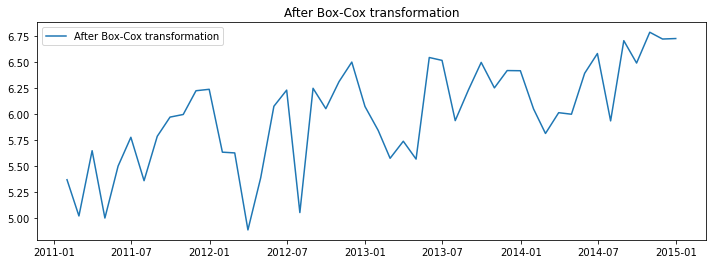

In [88]:
from scipy.stats import boxcox
data_boxcox= pd.Series(boxcox(Quantity_forecast['Quantity'], lmbda=0), index= Quantity_forecast.index)
                       
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box-Cox transformation')
plt.legend(loc='best')
plt.title('After Box-Cox transformation')
plt.show()

### 2. Differencing
- To remove the trend (to make the mean constant) in a time series you use the technique called differencing. Differencing stabilises the mean of a time series by removing changes in the level of a time series and therefore eliminating (or reducing) trend and seasonality.

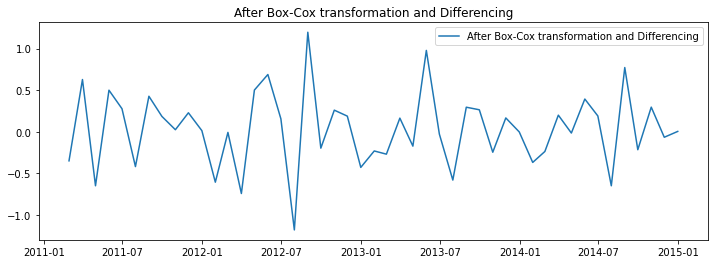

In [89]:
data_boxcox_diff= pd.Series(data_boxcox - data_boxcox.shift(), index= Quantity_forecast.index)
data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box-Cox transformation and Differencing')
plt.legend(loc='best')
plt.title('After Box-Cox transformation and Differencing')
plt.show()

bcz trend and sesonality will be removed using differentiation 

### Again check using stationary using ADF Test

In [90]:
from statsmodels.tsa.stattools import adfuller
adf_test= adfuller(data_boxcox_diff)

print('ADF statistic: %f' % adf_test[0])
print('Critical value @ 0.05: % f.2' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])
# p-value is less than 0.05. We reject the null hypothesis. so it is a stationary time series

ADF statistic: -6.731694
Critical value @ 0.05: -2.945951.2
p-value: 0.000000


**- After again check the data using stationary test (ADF) which shows that now this time series data is stationary**

# II) Autocorrelation function
Autocorrelation is capturing the relationship between observations y t at time t and y t-k at time k time period before t. In simpler words, autocorrelation helps us to know how a variable is influenced by its own lagged values. The autocorrelation function tells about the correlation between an observation with its lagged values. It helps you to determine which lag of the observation is influencing it the most.
The other interesting thing to notice is that the autocorrelation function captures both direct and indirect relationships between the variables.<br>We looked at two Autocorrelation measures here:
1. Autocorrelation function (ACF)
2. Partial autocorrelation function (PACF)

### 1. Autocorrelation function (ACF)
- capture indirect relationship

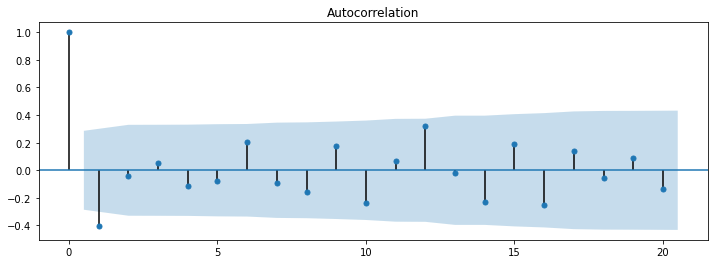

In [91]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,4))
acf= plot_acf(data_boxcox_diff, ax= plt.gca(), lags=20)
plt.show()

## 2. Partial autocorrelation function (PACF)

- capture direct relationships

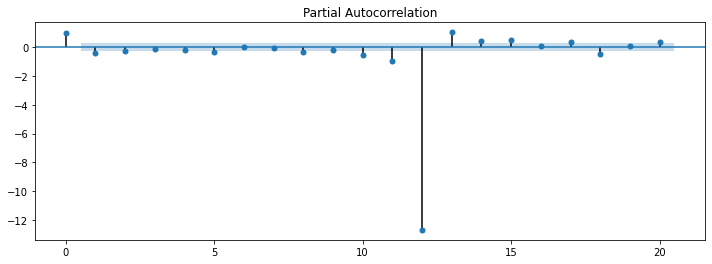

In [92]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
pacf= plot_pacf(data_boxcox_diff, ax= plt.gca(), lags=20)
plt.show()

# Split into training and test data sets

In [93]:
train_data_boxcox= data_boxcox[:train_len]
test_data_boxcox= data_boxcox[train_len:]
train_data_boxcox_diff= data_boxcox_diff[:train_len-1]
test_data_boxcox_diff= data_boxcox_diff[train_len-1:]

In [94]:
train_data_boxcox.shape

(42,)

In [95]:
train_data_boxcox_diff.head()

Order Date
2011-02-28   -0.348696
2011-03-31    0.628167
2011-04-30   -0.648235
2011-05-31    0.499956
2011-06-30    0.277383
Freq: M, dtype: float64

In [96]:
test_data_boxcox_diff

Order Date
2014-07-31   -0.648394
2014-08-31    0.772169
2014-09-30   -0.215209
2014-10-31    0.296383
2014-11-30   -0.065367
2014-12-31    0.004813
Freq: M, dtype: float64

In [97]:
print(train_data_boxcox_diff.shape)
print(test_data_boxcox_diff.shape)

(41,)
(6,)


### 1. Auto Regression Method (AR)
The Simple Auto Regressive model predicts the future observation as linear regression of one or more past observations. In simpler terms, the simple autoregressive model forecasts the dependent variable (future observation) when one or more independent variables are known (past observations). This model has a parameter ‘p’ called lag order . Lag order is the maximum number of lags used to build ‘p’ number of past data points to predict future data points.<br>
**here p=1 given** 

In [98]:
from statsmodels.tsa.arima_model import ARIMA
model= ARIMA(train_data_boxcox_diff, order=(1,0,0))
model_fit= model.fit()
print(model_fit.params)

const      0.031031
ar.L1.y   -0.354124
dtype: float64


In [99]:
data_boxcox_diff.index.min()

Timestamp('2011-02-28 00:00:00', freq='M')

In [100]:
data_boxcox_diff.index.max()

Timestamp('2014-12-31 00:00:00', freq='M')

### Recover original time series forecast

In [101]:
y_hat_ar= data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff']= model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox']= y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox']= y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast']= np.exp(y_hat_ar['ar_forecast_boxcox'])

In [102]:
y_hat_ar['ar_forecast'].head()

2011-02-28    220.744846
2011-03-31    260.475689
2011-04-30    217.474399
2011-05-31    285.332979
2011-06-30    249.293532
Freq: M, dtype: float64

### Plot train, test and forecast

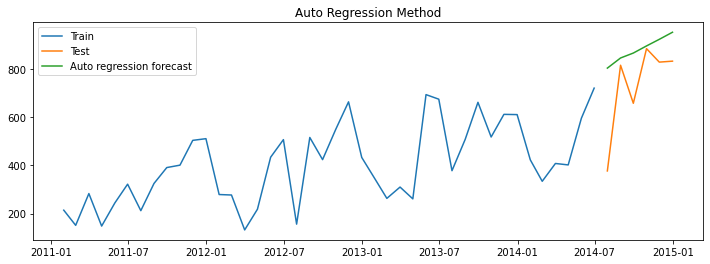

In [103]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label= 'Train')
plt.plot(test['Quantity'], label= 'Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label= "Auto regression forecast")
plt.legend(loc='best')
plt.title("Auto Regression Method")
plt.show()

### Calculate RMSE and MAPE to evaluate forecast

In [104]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(test['Quantity'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape= np.round(np.mean(np.abs(test['Quantity']-  y_hat_ar['ar_forecast'][test.index.min():])/test['Quantity'])*100,2)

tempresults= pd.DataFrame({"Method":["Auto Regressive(AR) Method"], 'MAPE':[mape], 'RMSE':[rmse]})
results= pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive Method,26.24,174.37
0,Simple Average Method,42.16,371.15
0,Simple Moving Average Method,35.55,279.36
0,Simple exponential smoothing forecast,34.15,261.71
0,Holt's Exponential Smoothing Method,29.29,213.30
0,Holt Winter's Additive Method,15.98,156.24
0,Holt Winter's Multiplicative Method,10.73,118.69
0,Auto Regressive(AR) Method,29.30,204.28


### 2. Moving Average Model (MA)
The Moving Average Model models the future forecasts using past forecast errors in a regression-like model. This model has a parameter ‘q’ called window size over which linear combination of errors are calculated

In [105]:
model= ARIMA(train_data_boxcox_diff, order=(0,0,1))
model_fit= model.fit()
print(model_fit.params)

const      0.022029
ma.L1.y   -1.000000
dtype: float64


### Recover original time series forecast

In [106]:
y_hat_ma= data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff']= model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox']= y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox']= y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast']= np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

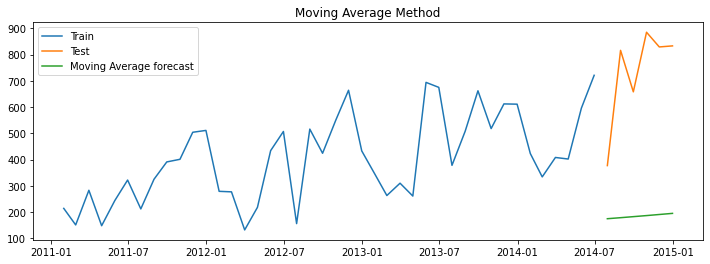

In [107]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label= 'Train')
plt.plot(test['Quantity'], label= 'Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label= "Moving Average forecast")
plt.legend(loc='best')
plt.title("Moving Average Method")
plt.show()

### Calculate RMSE and MAPE to evaluate forecast

In [108]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(test['Quantity'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape= np.round(np.mean(np.abs(test['Quantity']-  y_hat_ma['ma_forecast'][test.index.min():])/test['Quantity'])*100,2)

tempresults= pd.DataFrame({"Method":["Moving Average (MA) Method"], 'MAPE':[mape], 'RMSE':[rmse]})
results= pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive Method,26.24,174.37
0,Simple Average Method,42.16,371.15
0,Simple Moving Average Method,35.55,279.36
0,Simple exponential smoothing forecast,34.15,261.71
0,Holt's Exponential Smoothing Method,29.29,213.30
0,Holt Winter's Additive Method,15.98,156.24
0,Holt Winter's Multiplicative Method,10.73,118.69
0,Auto Regressive(AR) Method,29.30,204.28
0,Moving Average (MA) Method,72.76,573.80


### 3. Auto Regressive Moving Average (ARMA) Method
A time series that exhibits the characteristics of an AR(p) and/or an MA(q) process can be modelled using an ARMA(p,q) model.
To determine the parameters ‘p’ and ‘q’ —
- Plot autocorrelation function (ACF) and partial autocorrelation function (PACF)If you check the plot for PACF, you will see that you need to select p as the highest lag where partial autocorrelation is significantly high.<br>
- Similarly from the ACF plot, select q as the highest lag beyond which autocorrelation dies down.<br>
**here p=1 and q=1 are given.**

In [109]:
model= ARIMA(train_data_boxcox_diff, order=(1,0,1))
model_fit= model.fit()
print(model_fit.params)

const      0.022377
ar.L1.y    0.249107
ma.L1.y   -0.999970
dtype: float64


### Recover original time series forecast

In [110]:
y_hat_arma= data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff']= model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox']= y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox']= y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast']= np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

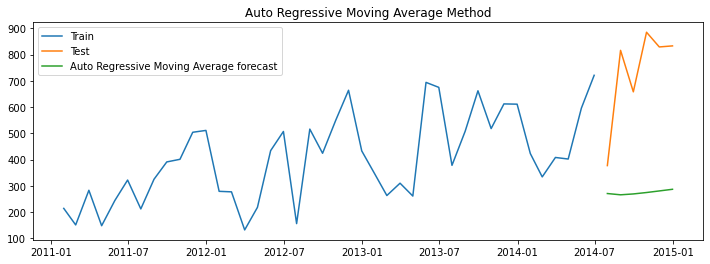

In [111]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label= 'Train')
plt.plot(test['Quantity'], label= 'Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label= "Auto Regressive Moving Average forecast")
plt.legend(loc='best')
plt.title("Auto Regressive Moving Average Method")
plt.show()

### Calculate RMSE and MAPE to evaluate forecast

In [112]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(test['Quantity'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape= np.round(np.mean(np.abs(test['Quantity']-  y_hat_arma['arma_forecast'][test.index.min():])/test['Quantity'])*100,2)

tempresults= pd.DataFrame({"Method":["Auto Regressive Moving Average (ARMA) Method"], 'MAPE':[mape], 'RMSE':[rmse]})
results= pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive Method,26.24,174.37
0,Simple Average Method,42.16,371.15
0,Simple Moving Average Method,35.55,279.36
0,Simple exponential smoothing forecast,34.15,261.71
0,Holt's Exponential Smoothing Method,29.29,213.30
0,Holt Winter's Additive Method,15.98,156.24
0,Holt Winter's Multiplicative Method,10.73,118.69
0,Auto Regressive(AR) Method,29.30,204.28
0,Moving Average (MA) Method,72.76,573.80
0,Auto Regressive Moving Average (ARMA) Method,59.25,489.45


### 4. Auto Regressive Integrated Moving Average (ARIMA)
Steps of ARIMA model
Original time series is differenced to make it stationary<br>
Differenced series is modeled as a linear regression of<br>
> 1.One or more past observations<br>
 2.Past forecast errors<br>
 
 
ARIMA model has three parameters<br>
>○ p: Highest lag included in the regression model<br>
○ d: Degree of differencing to make the series stationary<br>
○ q: Number of past error terms included in the regression model<br>
○ Here the new parameter introduced is the ‘I’ part called integrated. It removes the trend (non-stationarity) and later integrates the trend to the original series.<br>


- Initially you applied both the boxcox transformation and differencing in order to covert the data into a stationary time-series data.
- In ARIMA, **just applying boxcox before building the model and letting the model take care of the differencing i.e. the trend component itself.**

**here p=1, q=1 and d=1 given** 

In [113]:
model= ARIMA(train_data_boxcox, order=(1,1,1))
model_fit_ARIMA= model.fit()
print(model_fit.params)

const      0.022377
ar.L1.y    0.249107
ma.L1.y   -0.999970
dtype: float64


### Recover original time series forecast

In [114]:
y_hat_arima= data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff']= model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox']= y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox']= y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast']= np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

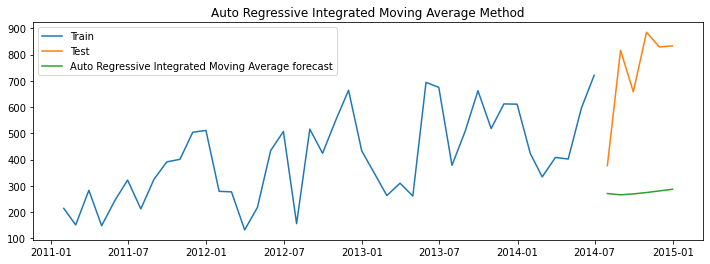

In [115]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label= 'Train')
plt.plot(test['Quantity'], label= 'Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label= "Auto Regressive Integrated Moving Average forecast")
plt.legend(loc='best')
plt.title("Auto Regressive Integrated Moving Average Method")
plt.show()

### Calculate RMSE and MAPE to evaluate forecast

In [116]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(test['Quantity'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape= np.round(np.mean(np.abs(test['Quantity']-  y_hat_arima['arima_forecast'][test.index.min():])/test['Quantity'])*100,2)

tempresults= pd.DataFrame({"Method":["Auto Regressive Integrated Moving Average (ARIMA) Method"], 'MAPE':[mape], 'RMSE':[rmse]})
results= pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive Method,26.24,174.37
0,Simple Average Method,42.16,371.15
0,Simple Moving Average Method,35.55,279.36
0,Simple exponential smoothing forecast,34.15,261.71
0,Holt's Exponential Smoothing Method,29.29,213.30
0,Holt Winter's Additive Method,15.98,156.24
0,Holt Winter's Multiplicative Method,10.73,118.69
0,Auto Regressive(AR) Method,29.30,204.28
0,Moving Average (MA) Method,72.76,573.80
0,Auto Regressive Moving Average (ARMA) Method,59.25,489.45


### 5. Seasonal Auto Regressive Integrated Moving Average(SARIMA)
SARIMA brings all the features of an ARIMA model with an extra feature - seasonality.<br>
The non-seasonal elements of SARIMA<br>
> 1.Time series is differenced to make it stationary.<br>
2. Models future observation as linear regression of past observations and past forecast errors.<br>

The seasonal elements of SARIMA<br>
> 1. Perform seasonal differencing on time series.<br>
> 2.  Model future seasonality as linear regression of past observations of seasonality and past forecast errors of seasonality.<br>

**The parameters ‘p’, ‘d’, ‘q’ and ‘P’, ‘D’, ‘Q’:**<br>
> Non-seasonal elements<br>
>>○ p: Trend autoregression order<br>
○ d: Trend difference order<br>
○ q: Trend moving average order<br>

> Seasonal elements<br>
>>○ m: The number of time steps for a single seasonal period<br>
○ P: Seasonal autoregressive order<br>
○ D: Seasonal difference order<br>
○ Q: Seasonal moving average order<br>

**here p=q=d=1 and P=D=Q=1 and m=12**

In [117]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
print(model_fit.params)


ar.L1      -0.017532
ma.L1      -0.994462
ar.S.L12   -0.410687
ma.S.L12   -0.992378
sigma2      0.032973
dtype: float64


### Recover original time series forecast

In [118]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

In [119]:
SARIMA =y_hat_sarima['sarima_forecast']

In [120]:
SARIMA.head()

2011-02-28    213.999934
2011-03-31    151.000007
2011-04-30    282.999979
2011-05-31    148.000011
2011-06-30    243.999986
Freq: M, dtype: float64

### Plot train, test and forecast

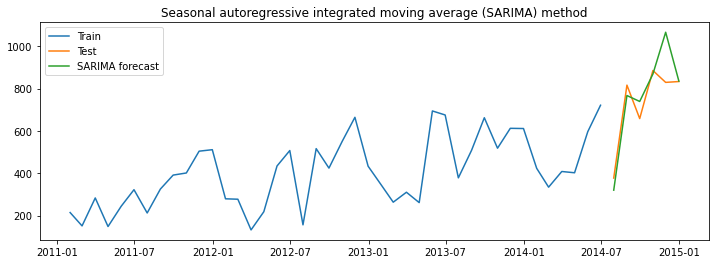

In [121]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()



### Calculate RMSE and MAPE to evaluate forecast

In [122]:

rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Quantity'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,174.37,26.24
0,Simple Average Method,371.15,42.16
0,Simple Moving Average Method,279.36,35.55
0,Simple exponential smoothing forecast,261.71,34.15
0,Holt's Exponential Smoothing Method,213.30,29.29
0,Holt Winter's Additive Method,156.24,15.98
0,Holt Winter's Multiplicative Method,118.69,10.73
0,Auto Regressive(AR) Method,204.28,29.30
0,Moving Average (MA) Method,573.80,72.76
0,Auto Regressive Moving Average (ARMA) Method,489.45,59.25


# Forecast the Qunatity of the products for the next 6 months(test data)

In [123]:
test

,Quantity
Order Date,
2014-07-31,377
2014-08-31,816
2014-09-30,658
2014-10-31,885
2014-11-30,829
2014-12-31,833


In [124]:
Holt_Winters_Additive.head()

Order Date
2014-07-31    412.603446
2014-08-31    596.452647
2014-09-30    665.429487
2014-10-31    630.085274
2014-11-30    734.348021
Freq: M, Name: hwa_forecast, dtype: float64

In [125]:
Holt_Winters_Multiplicative.head()

Order Date
2014-07-31    373.227992
2014-08-31    627.627281
2014-09-30    712.543317
2014-10-31    683.503273
2014-11-30    832.421480
Freq: M, Name: hwm_forecast, dtype: float64

In [126]:
SARIMA.head()

2011-02-28    213.999934
2011-03-31    151.000007
2011-04-30    282.999979
2011-05-31    148.000011
2011-06-30    243.999986
Freq: M, dtype: float64

In [127]:
SARIMA=y_hat_sarima['sarima_forecast'][test.index.min():]

In [128]:
SARIMA.head()

2014-07-31     319.802291
2014-08-31     766.920546
2014-09-30     738.828170
2014-10-31     868.352196
2014-11-30    1065.870980
Freq: M, dtype: float64

In [129]:
Prediction=pd.concat([test,SARIMA.rename('SARIMA'),Holt_Winters_Additive.rename('Holt Winter Additive'),Holt_Winters_Multiplicative.rename('Holt Winter Multlipicative')], axis=1)
Prediction

,Quantity,SARIMA,Holt Winter Additive,Holt Winter Multlipicative
Order Date,,,,
2014-07-31,377,319.802291,412.603446,373.227992
2014-08-31,816,766.920546,596.452647,627.627281
2014-09-30,658,738.828170,665.429487,712.543317
2014-10-31,885,868.352196,630.085274,683.503273
2014-11-30,829,1065.870980,734.348021,832.421480
2014-12-31,833,835.176232,681.357068,759.278085


# Conclusion

Using tis Retail Gaint Forecasting data , i found that for the **Quantity Forecast** of Most Profitable Market Segment is **"APAC_ consumer"**.
And after performing all the **smoothing techniques , Holt Winter's Multiplicative Method** is giving the **least MAPE value among all** .Simillarly after **performing all the Auto-Regressive models, Seasonal Auto Regressive Integrated Moving Average(SARIMA)** is giving the **least MAPE value** and it also satisfying the presence of Trend and Seasonality accordingly,  so it also satisfied the trend's and seaonality's presence accordingly and as well as its forecast is able to predict the sales and Quantity closer to the actual values and according to the chart also with both trend and seasonality present in data , Seasonal Auto Regressive Integrated Moving Average(SARIMA) and Holt Winter's Multiplicative Method both are also matched with the chart also that's why i have used them.

